In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

import os

#os.listdir('topic_data')
#os.listdir('topic_data/t1')

In [2]:
def build_word_dict(t, d, count, word_value, visited_words):
        f = open('topic_data/' + d + '/' + t, 'r')
        x = f.readlines()
        f.close()

        for entry in x:
            #print (entry.split())
            for word in entry.split():
                if word not in visited_words:
                    word_value[word] = count[0]
                    visited_words.add(word)
                    count[0] += 1 

def pre_process():
    
    topic_directories = os.listdir('topic_data')
    
    visited_words = set()
    word_value = {}
    count = [4]
    
    for d in topic_directories:
        #print (d)
        if d != '.DS_Store':
            for t in os.listdir('topic_data/' + d):
                if t != '.DS_Store':
                    build_word_dict(t, d, count, word_value, visited_words)
                    
                    
    return word_value



d = pre_process()   
#print (d)



In [3]:
#Make train data

word_value = pre_process()   
train_data = []
train_label = []

PAD = 0

#print (word_value)

def get_all_train_data(train_data, word_value, train_label):
    
    topic_directories = os.listdir('topic_data')
    
    visited_words = set()
    #word_value = {}
    count = [4]
    label_count = 0
    
    for d in topic_directories:
        #print (d)
        if d != '.DS_Store':
            for t in os.listdir('topic_data/' + d):
                if t != '.DS_Store':
                    #print (d, t)
                    f = open('topic_data/' + d + '/' + t, 'r')
                    x = f.readlines()
                    f.close()
                    for entry in x:
                        temp_sentence = []
                        for word in entry.split():
                            if word in word_value:
                                temp_sentence.append(word_value[word])
                            else:
                                temp_sentence.append('?')

                        if len(temp_sentence) != 0:
                            train_label.append(label_count)
                            train_data.append(temp_sentence)
            label_count += 1
                            
                    
                    
    return train_data, train_label


'''
for entry in x:
    temp_sentence = []
    for word in entry.split():
        if word in word_value:
            temp_sentence.append(word_value[word])
        else:
            temp_sentence.append('?')
            
    train_data.append(temp_sentence)

'''

get_all_train_data(train_data, word_value, train_label)
print (train_data[300])
print (max(train_label))

#deconde train entry
'''
a = train_data[150]
for num in a:
    for k in word_value.keys():
        if word_value[k] == num:
            print (k)
'''

max_len = -1
for entry in train_data:
    max_len = max(max_len, len(entry))

print (max_len)
#Add the paddings to each entry
for i, entry in enumerate(train_data):
    if len(entry) != max_len:
        pads_to_add = max_len - len(entry)
        for _ in range(pads_to_add):
            train_data[i].append(PAD)
            

#print (train_data[50])       
print (max_len)
#print (train_data[100])

[346, 3925, 5733, 11, 9, 196, 5734, 3557, 5735, 29, 619, 9, 5736, 166, 14, 2570, 5737, 212, 561, 63, 3826, 129, 1034, 9, 5738, 2734, 14, 9, 5739, 59, 14, 9, 5740, 5741, 5742, 5743, 331, 14, 5216, 20, 5744, 78, 858, 51, 5745, 506, 4940, 17, 63, 5746, 22, 5747, 205, 81, 3758, 11, 9, 1948, 11, 637, 14, 141, 5748, 164, 115, 5749, 9, 201, 1079, 5750, 1134, 22, 9, 5751, 2779, 29, 4, 5556, 203, 1892, 194, 834, 22, 147, 3325, 1572, 14, 613, 2488, 11, 5752, 5753, 29]
1
507
507


In [4]:
print (len(train_data))
print (len(train_label))
for i in range(len(train_label)):
    if train_label[i] == 1:
        print (i)
        break
        
print (train_label[1416])

final_train_data = train_data[:1134] + train_data[1417:2617]
final_train_label = train_label[:1134] + train_label[1417:2617]

final_test_data = train_data[1134:1417] + train_data[2617:]
final_test_label = train_label[1134:1417] + train_label[2617:]

print (len(final_train_data), len(final_train_label))
print (len(final_test_data), len(final_test_label))



2917
2917
1417
0
2334 2334
583 583


In [5]:


#print (train_data)
train_data = keras.preprocessing.sequence.pad_sequences(final_train_data, value=PAD, padding='post', maxlen=507)
test_data = keras.preprocessing.sequence.pad_sequences(final_test_data, value=PAD, padding='post', maxlen=507)

In [6]:
len(train_data[50])

507

In [7]:
train_data[0]

array([ 4,  5,  6,  7,  8,  9,  5, 10, 11,  9, 12, 13,  6, 14,  9, 15, 16,
       14, 17, 18,  4, 19, 20, 21, 22, 23, 24,  9, 25, 26, 14, 27, 28,  6,
       29, 30, 31, 32, 33, 34, 35, 22, 36, 37, 38, 39, 40, 41, 42, 43, 44,
       45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 29, 57, 58, 14,  9,
       59, 60,  9, 61, 62, 63, 64, 65, 66, 67, 14, 68, 12,  8, 69, 70, 22,
        9,  5, 71, 29,  4, 72, 73, 74, 14, 75, 76, 51, 77, 78, 79, 80, 81,
        9, 82, 83, 80, 81, 84, 85, 78, 86, 87, 11, 88,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0

In [8]:
len(train_data), len(train_data[1])

(2334, 507)

In [9]:
#27095

#vocab_size = 27095
vocab_size = 30000

model = keras.Sequential()
model.add(keras.layers.Embedding(vocab_size, 16))
model.add(keras.layers.GlobalAveragePooling1D())
model.add(keras.layers.Dense(16, activation=tf.nn.relu))
model.add(keras.layers.Dense(1, activation=tf.nn.sigmoid))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 16)          480000    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 16)                272       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 480,289
Trainable params: 480,289
Non-trainable params: 0
_________________________________________________________________


In [10]:
print (len(train_data))

#Loss function and optimizer
model.compile(optimizer=tf.train.AdamOptimizer(),
              loss='binary_crossentropy',
              metrics=['accuracy'])

#Need a validation set
x_val = train_data[:200] #350 was initial
partial_x_train = train_data[200:]

y_val = final_train_label[:200]
partial_y_train = final_train_label[200:]

#Train model
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=500,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=1)

2334
Train on 2134 samples, validate on 200 samples
Epoch 1/500
2134/2134 [==============================] - 1s 428us/step - loss: 0.7164 - acc: 0.4377 - val_loss: 0.6055 - val_acc: 1.0000
Epoch 2/500
2134/2134 [==============================] - 0s 63us/step - loss: 0.7052 - acc: 0.4377 - val_loss: 0.6515 - val_acc: 1.0000
Epoch 3/500
2134/2134 [==============================] - 0s 54us/step - loss: 0.6965 - acc: 0.4377 - val_loss: 0.6958 - val_acc: 0.0600
Epoch 4/500
2134/2134 [==============================] - 0s 52us/step - loss: 0.6917 - acc: 0.5595 - val_loss: 0.7374 - val_acc: 0.0000e+00
Epoch 5/500
2134/2134 [==============================] - 0s 50us/step - loss: 0.6880 - acc: 0.5623 - val_loss: 0.7723 - val_acc: 0.0000e+00
Epoch 6/500
2134/2134 [==============================] - 0s 52us/step - loss: 0.6865 - acc: 0.5623 - val_loss: 0.7980 - val_acc: 0.0000e+00
Epoch 7/500
2134/2134 [==============================] - 0s 58us/step - loss: 0.6856 - acc: 0.5623 - val_loss: 0.8137 -

Epoch 59/500
2134/2134 [==============================] - 0s 63us/step - loss: 0.6597 - acc: 0.5623 - val_loss: 0.8324 - val_acc: 0.0000e+00
Epoch 60/500
2134/2134 [==============================] - 0s 53us/step - loss: 0.6587 - acc: 0.5623 - val_loss: 0.8408 - val_acc: 0.0000e+00
Epoch 61/500
2134/2134 [==============================] - 0s 60us/step - loss: 0.6577 - acc: 0.5623 - val_loss: 0.8342 - val_acc: 0.0000e+00
Epoch 62/500
2134/2134 [==============================] - 0s 69us/step - loss: 0.6567 - acc: 0.5623 - val_loss: 0.8176 - val_acc: 0.0000e+00
Epoch 63/500
2134/2134 [==============================] - 0s 56us/step - loss: 0.6554 - acc: 0.5623 - val_loss: 0.8127 - val_acc: 0.0000e+00
Epoch 64/500
2134/2134 [==============================] - 0s 58us/step - loss: 0.6542 - acc: 0.5623 - val_loss: 0.8120 - val_acc: 0.0000e+00
Epoch 65/500
2134/2134 [==============================] - 0s 55us/step - loss: 0.6529 - acc: 0.5623 - val_loss: 0.8153 - val_acc: 0.0000e+00
Epoch 66/500


2134/2134 [==============================] - 0s 72us/step - loss: 0.5317 - acc: 0.7395 - val_loss: 0.8764 - val_acc: 0.3750
Epoch 119/500
2134/2134 [==============================] - 0s 62us/step - loss: 0.5283 - acc: 0.7437 - val_loss: 0.8981 - val_acc: 0.3500
Epoch 120/500
2134/2134 [==============================] - 0s 72us/step - loss: 0.5253 - acc: 0.7470 - val_loss: 0.8883 - val_acc: 0.3750
Epoch 121/500
2134/2134 [==============================] - 0s 72us/step - loss: 0.5223 - acc: 0.7451 - val_loss: 0.8545 - val_acc: 0.4300
Epoch 122/500
2134/2134 [==============================] - 0s 65us/step - loss: 0.5198 - acc: 0.7427 - val_loss: 0.8727 - val_acc: 0.4100
Epoch 123/500
2134/2134 [==============================] - 0s 63us/step - loss: 0.5162 - acc: 0.7498 - val_loss: 0.9099 - val_acc: 0.3550
Epoch 124/500
2134/2134 [==============================] - 0s 57us/step - loss: 0.5129 - acc: 0.7549 - val_loss: 0.9078 - val_acc: 0.3600
Epoch 125/500
2134/2134 [=======================

2134/2134 [==============================] - 0s 52us/step - loss: 0.3252 - acc: 0.8993 - val_loss: 0.7655 - val_acc: 0.5850
Epoch 178/500
2134/2134 [==============================] - 0s 48us/step - loss: 0.3226 - acc: 0.9189 - val_loss: 0.8178 - val_acc: 0.5200
Epoch 179/500
2134/2134 [==============================] - 0s 47us/step - loss: 0.3196 - acc: 0.9171 - val_loss: 0.7367 - val_acc: 0.5950
Epoch 180/500
2134/2134 [==============================] - 0s 49us/step - loss: 0.3158 - acc: 0.9053 - val_loss: 0.7471 - val_acc: 0.5950
Epoch 181/500
2134/2134 [==============================] - 0s 50us/step - loss: 0.3127 - acc: 0.9124 - val_loss: 0.7627 - val_acc: 0.5800
Epoch 182/500
2134/2134 [==============================] - 0s 48us/step - loss: 0.3098 - acc: 0.9175 - val_loss: 0.7576 - val_acc: 0.5800
Epoch 183/500
2134/2134 [==============================] - 0s 50us/step - loss: 0.3069 - acc: 0.9180 - val_loss: 0.7434 - val_acc: 0.5950
Epoch 184/500
2134/2134 [=======================

2134/2134 [==============================] - 0s 62us/step - loss: 0.1971 - acc: 0.9475 - val_loss: 0.6215 - val_acc: 0.7350
Epoch 237/500
2134/2134 [==============================] - 0s 67us/step - loss: 0.1954 - acc: 0.9494 - val_loss: 0.6634 - val_acc: 0.6800
Epoch 238/500
2134/2134 [==============================] - 0s 60us/step - loss: 0.1947 - acc: 0.9606 - val_loss: 0.6763 - val_acc: 0.6600
Epoch 239/500
2134/2134 [==============================] - 0s 57us/step - loss: 0.1927 - acc: 0.9517 - val_loss: 0.5844 - val_acc: 0.7650
Epoch 240/500
2134/2134 [==============================] - 0s 66us/step - loss: 0.1927 - acc: 0.9419 - val_loss: 0.6178 - val_acc: 0.7400
Epoch 241/500
2134/2134 [==============================] - 0s 64us/step - loss: 0.1901 - acc: 0.9517 - val_loss: 0.6680 - val_acc: 0.6850
Epoch 242/500
2134/2134 [==============================] - 0s 64us/step - loss: 0.1888 - acc: 0.9616 - val_loss: 0.6542 - val_acc: 0.6900
Epoch 243/500
2134/2134 [=======================

2134/2134 [==============================] - 0s 50us/step - loss: 0.1349 - acc: 0.9686 - val_loss: 0.6121 - val_acc: 0.7400
Epoch 296/500
2134/2134 [==============================] - 0s 58us/step - loss: 0.1345 - acc: 0.9700 - val_loss: 0.6412 - val_acc: 0.7050
Epoch 297/500
2134/2134 [==============================] - 0s 70us/step - loss: 0.1335 - acc: 0.9709 - val_loss: 0.6164 - val_acc: 0.7400
Epoch 298/500
2134/2134 [==============================] - 0s 62us/step - loss: 0.1327 - acc: 0.9677 - val_loss: 0.6212 - val_acc: 0.7300
Epoch 299/500
2134/2134 [==============================] - 0s 71us/step - loss: 0.1319 - acc: 0.9695 - val_loss: 0.6294 - val_acc: 0.7200
Epoch 300/500
2134/2134 [==============================] - 0s 71us/step - loss: 0.1312 - acc: 0.9719 - val_loss: 0.6312 - val_acc: 0.7150
Epoch 301/500
2134/2134 [==============================] - 0s 56us/step - loss: 0.1305 - acc: 0.9719 - val_loss: 0.6185 - val_acc: 0.7300
Epoch 302/500
2134/2134 [=======================

2134/2134 [==============================] - 0s 52us/step - loss: 0.0996 - acc: 0.9742 - val_loss: 0.6266 - val_acc: 0.7200
Epoch 355/500
2134/2134 [==============================] - 0s 56us/step - loss: 0.0988 - acc: 0.9770 - val_loss: 0.6467 - val_acc: 0.7050
Epoch 356/500
2134/2134 [==============================] - 0s 71us/step - loss: 0.0984 - acc: 0.9794 - val_loss: 0.6381 - val_acc: 0.7200
Epoch 357/500
2134/2134 [==============================] - 0s 55us/step - loss: 0.0979 - acc: 0.9808 - val_loss: 0.6508 - val_acc: 0.7000
Epoch 358/500
2134/2134 [==============================] - 0s 53us/step - loss: 0.0975 - acc: 0.9817 - val_loss: 0.6502 - val_acc: 0.7000
Epoch 359/500
2134/2134 [==============================] - 0s 52us/step - loss: 0.0969 - acc: 0.9808 - val_loss: 0.6228 - val_acc: 0.7300
Epoch 360/500
2134/2134 [==============================] - 0s 54us/step - loss: 0.0966 - acc: 0.9770 - val_loss: 0.6146 - val_acc: 0.7350
Epoch 361/500
2134/2134 [=======================

2134/2134 [==============================] - 0s 50us/step - loss: 0.0762 - acc: 0.9864 - val_loss: 0.6388 - val_acc: 0.7250
Epoch 414/500
2134/2134 [==============================] - 0s 49us/step - loss: 0.0759 - acc: 0.9869 - val_loss: 0.6459 - val_acc: 0.7250
Epoch 415/500
2134/2134 [==============================] - 0s 54us/step - loss: 0.0756 - acc: 0.9878 - val_loss: 0.6529 - val_acc: 0.7150
Epoch 416/500
2134/2134 [==============================] - 0s 56us/step - loss: 0.0752 - acc: 0.9878 - val_loss: 0.6608 - val_acc: 0.7050
Epoch 417/500
2134/2134 [==============================] - 0s 55us/step - loss: 0.0750 - acc: 0.9883 - val_loss: 0.6681 - val_acc: 0.7000
Epoch 418/500
2134/2134 [==============================] - 0s 52us/step - loss: 0.0746 - acc: 0.9878 - val_loss: 0.6448 - val_acc: 0.7250
Epoch 419/500
2134/2134 [==============================] - 0s 50us/step - loss: 0.0744 - acc: 0.9864 - val_loss: 0.6516 - val_acc: 0.7250
Epoch 420/500
2134/2134 [=======================

2134/2134 [==============================] - 0s 55us/step - loss: 0.0603 - acc: 0.9906 - val_loss: 0.6889 - val_acc: 0.7050
Epoch 473/500
2134/2134 [==============================] - 0s 70us/step - loss: 0.0600 - acc: 0.9897 - val_loss: 0.6795 - val_acc: 0.7100
Epoch 474/500
2134/2134 [==============================] - 0s 66us/step - loss: 0.0597 - acc: 0.9897 - val_loss: 0.6649 - val_acc: 0.7300
Epoch 475/500
2134/2134 [==============================] - 0s 67us/step - loss: 0.0595 - acc: 0.9892 - val_loss: 0.6747 - val_acc: 0.7150
Epoch 476/500
2134/2134 [==============================] - 0s 64us/step - loss: 0.0594 - acc: 0.9897 - val_loss: 0.6893 - val_acc: 0.7050
Epoch 477/500
2134/2134 [==============================] - 0s 57us/step - loss: 0.0591 - acc: 0.9892 - val_loss: 0.6505 - val_acc: 0.7450
Epoch 478/500
2134/2134 [==============================] - 0s 49us/step - loss: 0.0591 - acc: 0.9883 - val_loss: 0.6372 - val_acc: 0.7550
Epoch 479/500
2134/2134 [=======================

In [11]:
results = model.evaluate(test_data, final_test_label)

print(results)

583/583 [==============================] - 0s 28us/step
[0.41378223924780994, 0.8610634648370498]


## Experiment with no Dropout

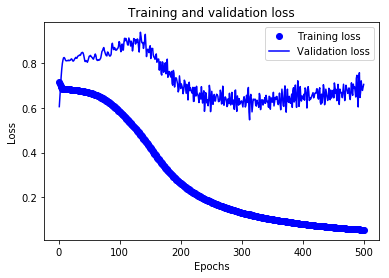

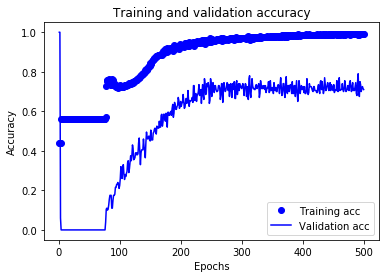

In [12]:
# Make use of matplot lib
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

#print (val_acc)

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()



plt.clf()   # clear figure
#acc_values = history_dict['acc']
#val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

### Dropout = 0.2 

In [13]:
#27095

#vocab_size = 27095
vocab_size = 30000

model = keras.Sequential()
model.add(keras.layers.Embedding(vocab_size, 16))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.GlobalAveragePooling1D())
model.add(keras.layers.Dense(16, activation=tf.nn.relu))
model.add(keras.layers.Dense(1, activation=tf.nn.sigmoid))

model.summary()

print (len(train_data))

#Loss function and optimizer
model.compile(optimizer=tf.train.AdamOptimizer(),
              loss='binary_crossentropy',
              metrics=['accuracy'])

#Need a validation set
x_val = train_data[:200] #350 was initial
partial_x_train = train_data[200:]

y_val = final_train_label[:200]
partial_y_train = final_train_label[200:]

#Train model
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=500,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=1)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 16)          480000    
_________________________________________________________________
dropout (Dropout)            (None, None, 16)          0         
_________________________________________________________________
global_average_pooling1d_1 ( (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 480,289
Trainable params: 480,289
Non-trainable params: 0
_________________________________________________________________
2334
Train on 2134 samples, validate on 200 samples
Epoch 1/500
2134/2134 [==============================] - 1s 331us/step - loss: 0.688

2134/2134 [==============================] - 0s 138us/step - loss: 0.5795 - acc: 0.7015 - val_loss: 0.9202 - val_acc: 0.3150
Epoch 53/500
2134/2134 [==============================] - 0s 134us/step - loss: 0.5779 - acc: 0.7006 - val_loss: 0.9465 - val_acc: 0.2900
Epoch 54/500
2134/2134 [==============================] - 0s 108us/step - loss: 0.5753 - acc: 0.7057 - val_loss: 0.9520 - val_acc: 0.2900
Epoch 55/500
2134/2134 [==============================] - 0s 110us/step - loss: 0.5726 - acc: 0.7071 - val_loss: 0.9251 - val_acc: 0.3300
Epoch 56/500
2134/2134 [==============================] - 0s 136us/step - loss: 0.5699 - acc: 0.7029 - val_loss: 0.9171 - val_acc: 0.3350
Epoch 57/500
2134/2134 [==============================] - 0s 118us/step - loss: 0.5680 - acc: 0.7104 - val_loss: 0.9157 - val_acc: 0.3400
Epoch 58/500
2134/2134 [==============================] - 0s 108us/step - loss: 0.5661 - acc: 0.7081 - val_loss: 0.9455 - val_acc: 0.3050
Epoch 59/500
2134/2134 [=======================

2134/2134 [==============================] - 0s 110us/step - loss: 0.3649 - acc: 0.9039 - val_loss: 0.7713 - val_acc: 0.5800
Epoch 112/500
2134/2134 [==============================] - 0s 140us/step - loss: 0.3588 - acc: 0.8903 - val_loss: 0.7789 - val_acc: 0.5750
Epoch 113/500
2134/2134 [==============================] - 0s 126us/step - loss: 0.3565 - acc: 0.8950 - val_loss: 0.7786 - val_acc: 0.5750
Epoch 114/500
2134/2134 [==============================] - 0s 108us/step - loss: 0.3522 - acc: 0.8903 - val_loss: 0.7559 - val_acc: 0.6000
Epoch 115/500
2134/2134 [==============================] - 0s 119us/step - loss: 0.3476 - acc: 0.8946 - val_loss: 0.7806 - val_acc: 0.5750
Epoch 116/500
2134/2134 [==============================] - 0s 110us/step - loss: 0.3441 - acc: 0.8946 - val_loss: 0.7254 - val_acc: 0.6200
Epoch 117/500
2134/2134 [==============================] - 0s 107us/step - loss: 0.3392 - acc: 0.8946 - val_loss: 0.7709 - val_acc: 0.5850
Epoch 118/500
2134/2134 [================

Epoch 170/500
2134/2134 [==============================] - 0s 110us/step - loss: 0.1932 - acc: 0.9550 - val_loss: 0.7965 - val_acc: 0.5800
Epoch 171/500
2134/2134 [==============================] - 0s 102us/step - loss: 0.1936 - acc: 0.9686 - val_loss: 0.6837 - val_acc: 0.6800
Epoch 172/500
2134/2134 [==============================] - 0s 102us/step - loss: 0.1891 - acc: 0.9480 - val_loss: 0.6407 - val_acc: 0.7200
Epoch 173/500
2134/2134 [==============================] - 0s 105us/step - loss: 0.1895 - acc: 0.9480 - val_loss: 0.7095 - val_acc: 0.6500
Epoch 174/500
2134/2134 [==============================] - 0s 109us/step - loss: 0.1857 - acc: 0.9597 - val_loss: 0.6813 - val_acc: 0.6800
Epoch 175/500
2134/2134 [==============================] - 0s 107us/step - loss: 0.1848 - acc: 0.9489 - val_loss: 0.6526 - val_acc: 0.7150
Epoch 176/500
2134/2134 [==============================] - 0s 99us/step - loss: 0.1823 - acc: 0.9494 - val_loss: 0.7068 - val_acc: 0.6550
Epoch 177/500
2134/2134 [===

Epoch 229/500
2134/2134 [==============================] - 0s 111us/step - loss: 0.1225 - acc: 0.9649 - val_loss: 0.6482 - val_acc: 0.7450
Epoch 230/500
2134/2134 [==============================] - 0s 119us/step - loss: 0.1207 - acc: 0.9705 - val_loss: 0.8142 - val_acc: 0.6200
Epoch 231/500
2134/2134 [==============================] - 0s 105us/step - loss: 0.1192 - acc: 0.9827 - val_loss: 0.6992 - val_acc: 0.6800
Epoch 232/500
2134/2134 [==============================] - 0s 98us/step - loss: 0.1194 - acc: 0.9653 - val_loss: 0.6148 - val_acc: 0.7600
Epoch 233/500
2134/2134 [==============================] - 0s 103us/step - loss: 0.1184 - acc: 0.9667 - val_loss: 0.7672 - val_acc: 0.6500
Epoch 234/500
2134/2134 [==============================] - 0s 112us/step - loss: 0.1166 - acc: 0.9784 - val_loss: 0.7030 - val_acc: 0.6800
Epoch 235/500
2134/2134 [==============================] - 0s 101us/step - loss: 0.1142 - acc: 0.9667 - val_loss: 0.6749 - val_acc: 0.7300
Epoch 236/500
2134/2134 [===

Epoch 288/500
2134/2134 [==============================] - 0s 109us/step - loss: 0.0812 - acc: 0.9831 - val_loss: 0.7359 - val_acc: 0.6950
Epoch 289/500
2134/2134 [==============================] - 0s 110us/step - loss: 0.0832 - acc: 0.9794 - val_loss: 0.7085 - val_acc: 0.7100
Epoch 290/500
2134/2134 [==============================] - 0s 124us/step - loss: 0.0823 - acc: 0.9789 - val_loss: 0.7442 - val_acc: 0.6900
Epoch 291/500
2134/2134 [==============================] - 0s 124us/step - loss: 0.0820 - acc: 0.9855 - val_loss: 0.8342 - val_acc: 0.6500
Epoch 292/500
2134/2134 [==============================] - 0s 117us/step - loss: 0.0804 - acc: 0.9878 - val_loss: 0.7416 - val_acc: 0.6900
Epoch 293/500
2134/2134 [==============================] - 0s 117us/step - loss: 0.0811 - acc: 0.9789 - val_loss: 0.6964 - val_acc: 0.7350
Epoch 294/500
2134/2134 [==============================] - 0s 113us/step - loss: 0.0799 - acc: 0.9803 - val_loss: 0.8107 - val_acc: 0.6650
Epoch 295/500
2134/2134 [==

Epoch 347/500
2134/2134 [==============================] - 0s 115us/step - loss: 0.0611 - acc: 0.9864 - val_loss: 0.8370 - val_acc: 0.6850
Epoch 348/500
2134/2134 [==============================] - 0s 108us/step - loss: 0.0584 - acc: 0.9902 - val_loss: 0.8451 - val_acc: 0.6850
Epoch 349/500
2134/2134 [==============================] - 0s 100us/step - loss: 0.0582 - acc: 0.9892 - val_loss: 0.7834 - val_acc: 0.6950
Epoch 350/500
2134/2134 [==============================] - 0s 98us/step - loss: 0.0589 - acc: 0.9878 - val_loss: 0.9036 - val_acc: 0.6500
Epoch 351/500
2134/2134 [==============================] - 0s 102us/step - loss: 0.0609 - acc: 0.9906 - val_loss: 0.8821 - val_acc: 0.6700
Epoch 352/500
2134/2134 [==============================] - 0s 101us/step - loss: 0.0581 - acc: 0.9873 - val_loss: 0.7773 - val_acc: 0.7000
Epoch 353/500
2134/2134 [==============================] - 0s 99us/step - loss: 0.0578 - acc: 0.9873 - val_loss: 0.8151 - val_acc: 0.6850
Epoch 354/500
2134/2134 [====

Epoch 406/500
2134/2134 [==============================] - 0s 156us/step - loss: 0.0454 - acc: 0.9892 - val_loss: 0.8987 - val_acc: 0.6800
Epoch 407/500
2134/2134 [==============================] - 0s 192us/step - loss: 0.0464 - acc: 0.9916 - val_loss: 0.9163 - val_acc: 0.6750
Epoch 408/500
2134/2134 [==============================] - 0s 145us/step - loss: 0.0450 - acc: 0.9892 - val_loss: 0.7981 - val_acc: 0.7350
Epoch 409/500
2134/2134 [==============================] - 0s 135us/step - loss: 0.0456 - acc: 0.9888 - val_loss: 0.8588 - val_acc: 0.6900
Epoch 410/500
2134/2134 [==============================] - 0s 136us/step - loss: 0.0457 - acc: 0.9911 - val_loss: 0.9097 - val_acc: 0.6800
Epoch 411/500
2134/2134 [==============================] - 0s 130us/step - loss: 0.0445 - acc: 0.9911 - val_loss: 0.8661 - val_acc: 0.6900
Epoch 412/500
2134/2134 [==============================] - 0s 125us/step - loss: 0.0447 - acc: 0.9902 - val_loss: 0.8850 - val_acc: 0.6800
Epoch 413/500
2134/2134 [==

Epoch 465/500
2134/2134 [==============================] - 0s 101us/step - loss: 0.0364 - acc: 0.9911 - val_loss: 0.9226 - val_acc: 0.6800
Epoch 466/500
2134/2134 [==============================] - 0s 103us/step - loss: 0.0356 - acc: 0.9916 - val_loss: 0.8820 - val_acc: 0.7050
Epoch 467/500
2134/2134 [==============================] - 0s 114us/step - loss: 0.0367 - acc: 0.9911 - val_loss: 0.8940 - val_acc: 0.6950
Epoch 468/500
2134/2134 [==============================] - 0s 144us/step - loss: 0.0363 - acc: 0.9911 - val_loss: 0.9148 - val_acc: 0.6850
Epoch 469/500
2134/2134 [==============================] - 0s 130us/step - loss: 0.0370 - acc: 0.9925 - val_loss: 0.9726 - val_acc: 0.6650
Epoch 470/500
2134/2134 [==============================] - 0s 118us/step - loss: 0.0358 - acc: 0.9916 - val_loss: 0.9021 - val_acc: 0.6900
Epoch 471/500
2134/2134 [==============================] - 0s 123us/step - loss: 0.0357 - acc: 0.9911 - val_loss: 0.9243 - val_acc: 0.6850
Epoch 472/500
2134/2134 [==

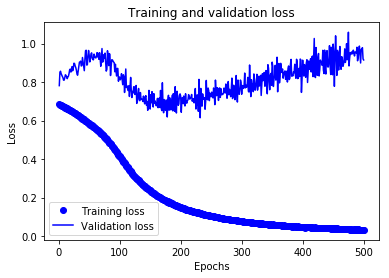

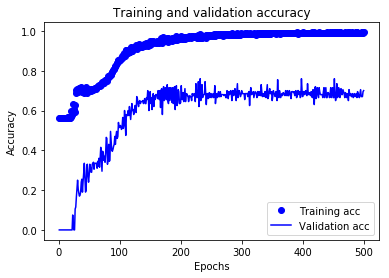

In [14]:
# Make use of matplot lib
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

#print (val_acc)

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()



plt.clf()   # clear figure
#acc_values = history_dict['acc']
#val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

## Dropout 0.5

In [16]:
#27095

#vocab_size = 27095
vocab_size = 30000

model = keras.Sequential()
model.add(keras.layers.Embedding(vocab_size, 16))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.GlobalAveragePooling1D())
model.add(keras.layers.Dense(16, activation=tf.nn.relu))
model.add(keras.layers.Dense(1, activation=tf.nn.sigmoid))

model.summary()

print (len(train_data))

#Loss function and optimizer
model.compile(optimizer=tf.train.AdamOptimizer(),
              loss='binary_crossentropy',
              metrics=['accuracy'])

#Need a validation set
x_val = train_data[:200] #350 was initial
partial_x_train = train_data[200:]

y_val = final_train_label[:200]
partial_y_train = final_train_label[200:]

#Train model
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=500,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=1)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 16)          480000    
_________________________________________________________________
dropout_2 (Dropout)          (None, None, 16)          0         
_________________________________________________________________
global_average_pooling1d_3 ( (None, 16)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 17        
Total params: 480,289
Trainable params: 480,289
Non-trainable params: 0
_________________________________________________________________
2334
Train on 2134 samples, validate on 200 samples
Epoch 1/500
2134/2134 [==============================] - 1s 356us/step - loss: 0.688

Epoch 52/500
2134/2134 [==============================] - 0s 114us/step - loss: 0.6201 - acc: 0.6903 - val_loss: 0.9074 - val_acc: 0.2050
Epoch 53/500
2134/2134 [==============================] - 0s 110us/step - loss: 0.6188 - acc: 0.6987 - val_loss: 0.9251 - val_acc: 0.1900
Epoch 54/500
2134/2134 [==============================] - 0s 113us/step - loss: 0.6174 - acc: 0.7076 - val_loss: 0.9380 - val_acc: 0.1900
Epoch 55/500
2134/2134 [==============================] - 0s 104us/step - loss: 0.6152 - acc: 0.7067 - val_loss: 0.9276 - val_acc: 0.2050
Epoch 56/500
2134/2134 [==============================] - 0s 107us/step - loss: 0.6140 - acc: 0.6940 - val_loss: 0.9005 - val_acc: 0.2650
Epoch 57/500
2134/2134 [==============================] - 0s 105us/step - loss: 0.6126 - acc: 0.6888 - val_loss: 0.8996 - val_acc: 0.2700
Epoch 58/500
2134/2134 [==============================] - 0s 109us/step - loss: 0.6105 - acc: 0.6870 - val_loss: 0.9078 - val_acc: 0.2700
Epoch 59/500
2134/2134 [==========

2134/2134 [==============================] - 0s 104us/step - loss: 0.5168 - acc: 0.7320 - val_loss: 0.9457 - val_acc: 0.4150
Epoch 112/500
2134/2134 [==============================] - 0s 107us/step - loss: 0.5145 - acc: 0.7301 - val_loss: 0.9181 - val_acc: 0.4250
Epoch 113/500
2134/2134 [==============================] - 0s 103us/step - loss: 0.5132 - acc: 0.7329 - val_loss: 0.9536 - val_acc: 0.4150
Epoch 114/500
2134/2134 [==============================] - 0s 96us/step - loss: 0.5092 - acc: 0.7395 - val_loss: 0.9719 - val_acc: 0.3800
Epoch 115/500
2134/2134 [==============================] - 0s 102us/step - loss: 0.5066 - acc: 0.7441 - val_loss: 0.9356 - val_acc: 0.4200
Epoch 116/500
2134/2134 [==============================] - 0s 105us/step - loss: 0.5050 - acc: 0.7423 - val_loss: 0.9138 - val_acc: 0.4300
Epoch 117/500
2134/2134 [==============================] - 0s 102us/step - loss: 0.5010 - acc: 0.7451 - val_loss: 0.9793 - val_acc: 0.3800
Epoch 118/500
2134/2134 [=================

2134/2134 [==============================] - 0s 104us/step - loss: 0.3264 - acc: 0.9049 - val_loss: 0.8158 - val_acc: 0.5600
Epoch 171/500
2134/2134 [==============================] - 0s 104us/step - loss: 0.3201 - acc: 0.9119 - val_loss: 0.7975 - val_acc: 0.5800
Epoch 172/500
2134/2134 [==============================] - 0s 103us/step - loss: 0.3165 - acc: 0.9086 - val_loss: 0.7388 - val_acc: 0.6300
Epoch 173/500
2134/2134 [==============================] - 0s 102us/step - loss: 0.3146 - acc: 0.8960 - val_loss: 0.7531 - val_acc: 0.6150
Epoch 174/500
2134/2134 [==============================] - 0s 157us/step - loss: 0.3110 - acc: 0.9096 - val_loss: 0.7998 - val_acc: 0.5800
Epoch 175/500
2134/2134 [==============================] - 0s 118us/step - loss: 0.3102 - acc: 0.9189 - val_loss: 0.7755 - val_acc: 0.6050
Epoch 176/500
2134/2134 [==============================] - 0s 180us/step - loss: 0.3073 - acc: 0.9082 - val_loss: 0.7318 - val_acc: 0.6350
Epoch 177/500
2134/2134 [================

Epoch 229/500
2134/2134 [==============================] - 0s 114us/step - loss: 0.1956 - acc: 0.9569 - val_loss: 0.6531 - val_acc: 0.7150
Epoch 230/500
2134/2134 [==============================] - 0s 112us/step - loss: 0.1925 - acc: 0.9447 - val_loss: 0.6475 - val_acc: 0.7250
Epoch 231/500
2134/2134 [==============================] - 0s 103us/step - loss: 0.1889 - acc: 0.9531 - val_loss: 0.7033 - val_acc: 0.6800
Epoch 232/500
2134/2134 [==============================] - 0s 107us/step - loss: 0.1888 - acc: 0.9602 - val_loss: 0.7044 - val_acc: 0.6800
Epoch 233/500
2134/2134 [==============================] - 0s 107us/step - loss: 0.1867 - acc: 0.9583 - val_loss: 0.6424 - val_acc: 0.7300
Epoch 234/500
2134/2134 [==============================] - 0s 106us/step - loss: 0.1885 - acc: 0.9452 - val_loss: 0.6511 - val_acc: 0.7250
Epoch 235/500
2134/2134 [==============================] - 0s 107us/step - loss: 0.1853 - acc: 0.9588 - val_loss: 0.7247 - val_acc: 0.6650
Epoch 236/500
2134/2134 [==

Epoch 288/500
2134/2134 [==============================] - 0s 124us/step - loss: 0.1326 - acc: 0.9653 - val_loss: 0.6444 - val_acc: 0.7500
Epoch 289/500
2134/2134 [==============================] - 0s 115us/step - loss: 0.1328 - acc: 0.9606 - val_loss: 0.6753 - val_acc: 0.7300
Epoch 290/500
2134/2134 [==============================] - 0s 151us/step - loss: 0.1292 - acc: 0.9719 - val_loss: 0.7161 - val_acc: 0.7050
Epoch 291/500
2134/2134 [==============================] - 0s 127us/step - loss: 0.1286 - acc: 0.9714 - val_loss: 0.6948 - val_acc: 0.7200
Epoch 292/500
2134/2134 [==============================] - 0s 130us/step - loss: 0.1305 - acc: 0.9681 - val_loss: 0.6871 - val_acc: 0.7250
Epoch 293/500
2134/2134 [==============================] - 0s 151us/step - loss: 0.1288 - acc: 0.9681 - val_loss: 0.7029 - val_acc: 0.7200
Epoch 294/500
2134/2134 [==============================] - 0s 123us/step - loss: 0.1279 - acc: 0.9709 - val_loss: 0.6902 - val_acc: 0.7200
Epoch 295/500
2134/2134 [==

Epoch 347/500
2134/2134 [==============================] - 0s 136us/step - loss: 0.1003 - acc: 0.9817 - val_loss: 0.7058 - val_acc: 0.7300
Epoch 348/500
2134/2134 [==============================] - 0s 123us/step - loss: 0.0996 - acc: 0.9695 - val_loss: 0.6525 - val_acc: 0.7600
Epoch 349/500
2134/2134 [==============================] - 0s 119us/step - loss: 0.0961 - acc: 0.9719 - val_loss: 0.7133 - val_acc: 0.7200
Epoch 350/500
2134/2134 [==============================] - 0s 116us/step - loss: 0.0952 - acc: 0.9789 - val_loss: 0.7181 - val_acc: 0.7200
Epoch 351/500
2134/2134 [==============================] - 0s 119us/step - loss: 0.0941 - acc: 0.9780 - val_loss: 0.7197 - val_acc: 0.7200
Epoch 352/500
2134/2134 [==============================] - 0s 114us/step - loss: 0.0939 - acc: 0.9775 - val_loss: 0.6826 - val_acc: 0.7550
Epoch 353/500
2134/2134 [==============================] - 0s 116us/step - loss: 0.0946 - acc: 0.9794 - val_loss: 0.7029 - val_acc: 0.7350
Epoch 354/500
2134/2134 [==

Epoch 406/500
2134/2134 [==============================] - 0s 138us/step - loss: 0.0746 - acc: 0.9859 - val_loss: 0.7660 - val_acc: 0.7100
Epoch 407/500
2134/2134 [==============================] - 0s 132us/step - loss: 0.0726 - acc: 0.9855 - val_loss: 0.7257 - val_acc: 0.7550
Epoch 408/500
2134/2134 [==============================] - 0s 132us/step - loss: 0.0740 - acc: 0.9803 - val_loss: 0.7343 - val_acc: 0.7550
Epoch 409/500
2134/2134 [==============================] - 0s 120us/step - loss: 0.0743 - acc: 0.9827 - val_loss: 0.7121 - val_acc: 0.7550
Epoch 410/500
2134/2134 [==============================] - 0s 112us/step - loss: 0.0729 - acc: 0.9817 - val_loss: 0.7688 - val_acc: 0.7150
Epoch 411/500
2134/2134 [==============================] - 0s 106us/step - loss: 0.0735 - acc: 0.9873 - val_loss: 0.8208 - val_acc: 0.7000
Epoch 412/500
2134/2134 [==============================] - 0s 106us/step - loss: 0.0744 - acc: 0.9859 - val_loss: 0.7397 - val_acc: 0.7550
Epoch 413/500
2134/2134 [==

2134/2134 [==============================] - 0s 109us/step - loss: 0.0596 - acc: 0.9855 - val_loss: 0.7798 - val_acc: 0.7500
Epoch 466/500
2134/2134 [==============================] - 0s 100us/step - loss: 0.0602 - acc: 0.9873 - val_loss: 0.8237 - val_acc: 0.7200
Epoch 467/500
2134/2134 [==============================] - 0s 99us/step - loss: 0.0584 - acc: 0.9878 - val_loss: 0.7487 - val_acc: 0.7550
Epoch 468/500
2134/2134 [==============================] - 0s 110us/step - loss: 0.0574 - acc: 0.9859 - val_loss: 0.7843 - val_acc: 0.7500
Epoch 469/500
2134/2134 [==============================] - 0s 117us/step - loss: 0.0567 - acc: 0.9878 - val_loss: 0.8081 - val_acc: 0.7350
Epoch 470/500
2134/2134 [==============================] - 0s 115us/step - loss: 0.0587 - acc: 0.9869 - val_loss: 0.8293 - val_acc: 0.7200
Epoch 471/500
2134/2134 [==============================] - 0s 109us/step - loss: 0.0569 - acc: 0.9888 - val_loss: 0.8453 - val_acc: 0.7100
Epoch 472/500
2134/2134 [=================

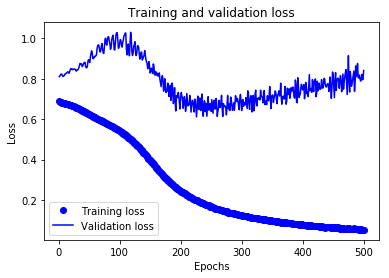

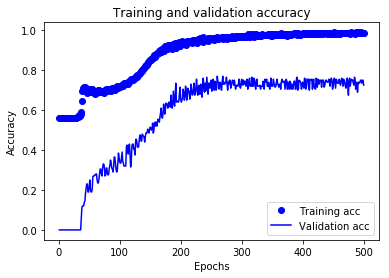

In [17]:
# Make use of matplot lib
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

#print (val_acc)

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()



plt.clf()   # clear figure
#acc_values = history_dict['acc']
#val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

## Dropout = 0.7

In [18]:
#27095

#vocab_size = 27095
vocab_size = 30000

model = keras.Sequential()
model.add(keras.layers.Embedding(vocab_size, 16))
model.add(keras.layers.Dropout(0.7))
model.add(keras.layers.GlobalAveragePooling1D())
model.add(keras.layers.Dense(16, activation=tf.nn.relu))
model.add(keras.layers.Dense(1, activation=tf.nn.sigmoid))

model.summary()

print (len(train_data))

#Loss function and optimizer
model.compile(optimizer=tf.train.AdamOptimizer(),
              loss='binary_crossentropy',
              metrics=['accuracy'])

#Need a validation set
x_val = train_data[:200] #350 was initial
partial_x_train = train_data[200:]

y_val = final_train_label[:200]
partial_y_train = final_train_label[200:]

#Train model
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=500,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=1)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, None, 16)          480000    
_________________________________________________________________
dropout_3 (Dropout)          (None, None, 16)          0         
_________________________________________________________________
global_average_pooling1d_4 ( (None, 16)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 17        
Total params: 480,289
Trainable params: 480,289
Non-trainable params: 0
_________________________________________________________________
2334
Train on 2134 samples, validate on 200 samples
Epoch 1/500
2134/2134 [==============================] - 1s 309us/step - loss: 0.698

2134/2134 [==============================] - 0s 109us/step - loss: 0.6400 - acc: 0.6720 - val_loss: 0.8121 - val_acc: 0.1850
Epoch 52/500
2134/2134 [==============================] - 0s 106us/step - loss: 0.6379 - acc: 0.6842 - val_loss: 0.8401 - val_acc: 0.1200
Epoch 53/500
2134/2134 [==============================] - 0s 111us/step - loss: 0.6366 - acc: 0.6589 - val_loss: 0.8680 - val_acc: 0.1050
Epoch 54/500
2134/2134 [==============================] - 0s 115us/step - loss: 0.6346 - acc: 0.6537 - val_loss: 0.8544 - val_acc: 0.1200
Epoch 55/500
2134/2134 [==============================] - 0s 106us/step - loss: 0.6331 - acc: 0.6757 - val_loss: 0.8423 - val_acc: 0.1450
Epoch 56/500
2134/2134 [==============================] - 0s 118us/step - loss: 0.6313 - acc: 0.6907 - val_loss: 0.8260 - val_acc: 0.1950
Epoch 57/500
2134/2134 [==============================] - 0s 104us/step - loss: 0.6292 - acc: 0.6973 - val_loss: 0.8130 - val_acc: 0.2350
Epoch 58/500
2134/2134 [=======================

2134/2134 [==============================] - 0s 99us/step - loss: 0.5477 - acc: 0.7291 - val_loss: 0.9156 - val_acc: 0.3150
Epoch 111/500
2134/2134 [==============================] - 0s 95us/step - loss: 0.5426 - acc: 0.7446 - val_loss: 0.8866 - val_acc: 0.3700
Epoch 112/500
2134/2134 [==============================] - 0s 100us/step - loss: 0.5396 - acc: 0.7301 - val_loss: 0.8395 - val_acc: 0.4550
Epoch 113/500
2134/2134 [==============================] - 0s 96us/step - loss: 0.5412 - acc: 0.7287 - val_loss: 0.8514 - val_acc: 0.4200
Epoch 114/500
2134/2134 [==============================] - 0s 95us/step - loss: 0.5380 - acc: 0.7404 - val_loss: 0.8842 - val_acc: 0.3750
Epoch 115/500
2134/2134 [==============================] - 0s 114us/step - loss: 0.5357 - acc: 0.7437 - val_loss: 0.9122 - val_acc: 0.3450
Epoch 116/500
2134/2134 [==============================] - 0s 113us/step - loss: 0.5338 - acc: 0.7460 - val_loss: 0.8907 - val_acc: 0.3750
Epoch 117/500
2134/2134 [====================

2134/2134 [==============================] - 0s 100us/step - loss: 0.3950 - acc: 0.8739 - val_loss: 0.7417 - val_acc: 0.5900
Epoch 170/500
2134/2134 [==============================] - 0s 96us/step - loss: 0.3903 - acc: 0.8660 - val_loss: 0.7342 - val_acc: 0.5900
Epoch 171/500
2134/2134 [==============================] - 0s 95us/step - loss: 0.3896 - acc: 0.8768 - val_loss: 0.7547 - val_acc: 0.5700
Epoch 172/500
2134/2134 [==============================] - 0s 91us/step - loss: 0.3887 - acc: 0.8749 - val_loss: 0.7637 - val_acc: 0.5700
Epoch 173/500
2134/2134 [==============================] - 0s 93us/step - loss: 0.3828 - acc: 0.8749 - val_loss: 0.7604 - val_acc: 0.5700
Epoch 174/500
2134/2134 [==============================] - 0s 92us/step - loss: 0.3793 - acc: 0.8754 - val_loss: 0.7372 - val_acc: 0.5900
Epoch 175/500
2134/2134 [==============================] - 0s 95us/step - loss: 0.3790 - acc: 0.8843 - val_loss: 0.7525 - val_acc: 0.5800
Epoch 176/500
2134/2134 [======================

2134/2134 [==============================] - 0s 93us/step - loss: 0.2684 - acc: 0.9171 - val_loss: 0.6267 - val_acc: 0.7050
Epoch 229/500
2134/2134 [==============================] - 0s 89us/step - loss: 0.2626 - acc: 0.9231 - val_loss: 0.6556 - val_acc: 0.6850
Epoch 230/500
2134/2134 [==============================] - 0s 93us/step - loss: 0.2623 - acc: 0.9330 - val_loss: 0.6128 - val_acc: 0.7200
Epoch 231/500
2134/2134 [==============================] - 0s 90us/step - loss: 0.2597 - acc: 0.9278 - val_loss: 0.5683 - val_acc: 0.7650
Epoch 232/500
2134/2134 [==============================] - 0s 92us/step - loss: 0.2608 - acc: 0.9260 - val_loss: 0.6237 - val_acc: 0.7150
Epoch 233/500
2134/2134 [==============================] - 0s 89us/step - loss: 0.2583 - acc: 0.9297 - val_loss: 0.6335 - val_acc: 0.6950
Epoch 234/500
2134/2134 [==============================] - 0s 89us/step - loss: 0.2544 - acc: 0.9278 - val_loss: 0.6235 - val_acc: 0.7150
Epoch 235/500
2134/2134 [=======================

2134/2134 [==============================] - 0s 99us/step - loss: 0.1970 - acc: 0.9353 - val_loss: 0.5889 - val_acc: 0.7450
Epoch 288/500
2134/2134 [==============================] - 0s 102us/step - loss: 0.1942 - acc: 0.9410 - val_loss: 0.6200 - val_acc: 0.7200
Epoch 289/500
2134/2134 [==============================] - 0s 104us/step - loss: 0.1961 - acc: 0.9367 - val_loss: 0.5905 - val_acc: 0.7450
Epoch 290/500
2134/2134 [==============================] - 0s 99us/step - loss: 0.1924 - acc: 0.9466 - val_loss: 0.5662 - val_acc: 0.7550
Epoch 291/500
2134/2134 [==============================] - 0s 107us/step - loss: 0.1975 - acc: 0.9386 - val_loss: 0.6157 - val_acc: 0.7250
Epoch 292/500
2134/2134 [==============================] - 0s 106us/step - loss: 0.1910 - acc: 0.9522 - val_loss: 0.5793 - val_acc: 0.7500
Epoch 293/500
2134/2134 [==============================] - 0s 110us/step - loss: 0.1915 - acc: 0.9433 - val_loss: 0.5534 - val_acc: 0.7550
Epoch 294/500
2134/2134 [==================

2134/2134 [==============================] - 0s 103us/step - loss: 0.1575 - acc: 0.9499 - val_loss: 0.5449 - val_acc: 0.7700
Epoch 347/500
2134/2134 [==============================] - 0s 121us/step - loss: 0.1537 - acc: 0.9583 - val_loss: 0.6158 - val_acc: 0.7100
Epoch 348/500
2134/2134 [==============================] - 0s 120us/step - loss: 0.1558 - acc: 0.9555 - val_loss: 0.5834 - val_acc: 0.7300
Epoch 349/500
2134/2134 [==============================] - 0s 96us/step - loss: 0.1485 - acc: 0.9545 - val_loss: 0.5032 - val_acc: 0.7950
Epoch 350/500
2134/2134 [==============================] - 0s 93us/step - loss: 0.1514 - acc: 0.9555 - val_loss: 0.5717 - val_acc: 0.7350
Epoch 351/500
2134/2134 [==============================] - 0s 110us/step - loss: 0.1542 - acc: 0.9527 - val_loss: 0.5902 - val_acc: 0.7250
Epoch 352/500
2134/2134 [==============================] - 0s 135us/step - loss: 0.1525 - acc: 0.9569 - val_loss: 0.5906 - val_acc: 0.7250
Epoch 353/500
2134/2134 [==================

2134/2134 [==============================] - 0s 92us/step - loss: 0.1252 - acc: 0.9602 - val_loss: 0.5491 - val_acc: 0.7550
Epoch 406/500
2134/2134 [==============================] - 0s 95us/step - loss: 0.1282 - acc: 0.9620 - val_loss: 0.5493 - val_acc: 0.7550
Epoch 407/500
2134/2134 [==============================] - 0s 91us/step - loss: 0.1226 - acc: 0.9677 - val_loss: 0.5455 - val_acc: 0.7550
Epoch 408/500
2134/2134 [==============================] - 0s 90us/step - loss: 0.1246 - acc: 0.9639 - val_loss: 0.5483 - val_acc: 0.7550
Epoch 409/500
2134/2134 [==============================] - 0s 91us/step - loss: 0.1241 - acc: 0.9625 - val_loss: 0.5396 - val_acc: 0.7700
Epoch 410/500
2134/2134 [==============================] - 0s 93us/step - loss: 0.1166 - acc: 0.9658 - val_loss: 0.5407 - val_acc: 0.7650
Epoch 411/500
2134/2134 [==============================] - 0s 94us/step - loss: 0.1258 - acc: 0.9602 - val_loss: 0.5730 - val_acc: 0.7350
Epoch 412/500
2134/2134 [=======================

2134/2134 [==============================] - 0s 93us/step - loss: 0.1035 - acc: 0.9653 - val_loss: 0.5846 - val_acc: 0.7350
Epoch 465/500
2134/2134 [==============================] - 0s 96us/step - loss: 0.1047 - acc: 0.9700 - val_loss: 0.6049 - val_acc: 0.7250
Epoch 466/500
2134/2134 [==============================] - 0s 94us/step - loss: 0.0954 - acc: 0.9808 - val_loss: 0.5559 - val_acc: 0.7600
Epoch 467/500
2134/2134 [==============================] - 0s 91us/step - loss: 0.1010 - acc: 0.9700 - val_loss: 0.5199 - val_acc: 0.7950
Epoch 468/500
2134/2134 [==============================] - 0s 91us/step - loss: 0.1035 - acc: 0.9681 - val_loss: 0.5817 - val_acc: 0.7350
Epoch 469/500
2134/2134 [==============================] - 0s 98us/step - loss: 0.1000 - acc: 0.9733 - val_loss: 0.5604 - val_acc: 0.7500
Epoch 470/500
2134/2134 [==============================] - 0s 100us/step - loss: 0.1027 - acc: 0.9658 - val_loss: 0.5657 - val_acc: 0.7500
Epoch 471/500
2134/2134 [======================

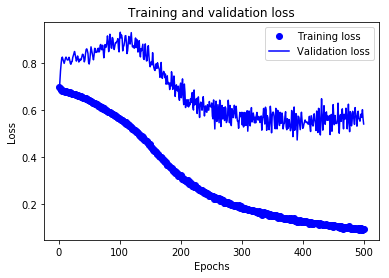

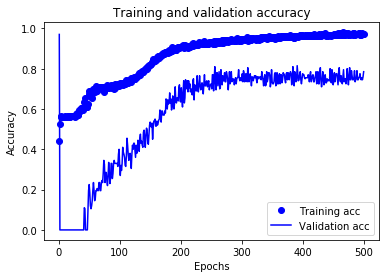

In [19]:
# Make use of matplot lib
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

#print (val_acc)

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()



plt.clf()   # clear figure
#acc_values = history_dict['acc']
#val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [22]:
#unk for rare words - throw out all words that occur once or twice
#using mask - learn how that can help the model
#experiment with different dropouts

## CNN Model

In [49]:
def create_conv_model():
    model_conv = keras.Sequential()
    model_conv.add(keras.layers.Embedding(vocab_size, 16, input_length=507))
    model_conv.add(keras.layers.Dropout(0.2))
    model_conv.add(keras.layers.Conv1D(64, 5, activation='relu'))
    model_conv.add(keras.layers.MaxPooling1D(pool_size=4))
    model_conv.add(keras.layers.LSTM(100))
    model_conv.add(keras.layers.Dense(1, activation='sigmoid'))
    model_conv.compile(loss='binary_crossentropy', optimizer='adam',    metrics=['accuracy'])
    return model_conv

model_conv = create_conv_model()
cnnHistory = model_conv.fit(partial_x_train, partial_y_train, epochs=3, validation_data=(x_val, y_val))




Train on 2134 samples, validate on 200 samples
Epoch 1/3
2134/2134 [==============================] - 12s 5ms/step - loss: 0.6913 - acc: 0.5403 - val_loss: 0.7272 - val_acc: 0.0000e+00
Epoch 2/3
2134/2134 [==============================] - 11s 5ms/step - loss: 0.6880 - acc: 0.5623 - val_loss: 0.7331 - val_acc: 0.0000e+00
Epoch 3/3
2134/2134 [==============================] - 10s 5ms/step - loss: 0.6867 - acc: 0.5623 - val_loss: 0.7470 - val_acc: 0.0000e+00


In [41]:
acc = cnnHistory.history['acc']
val_acc = cnnHistory.history['val_acc']
loss = cnnHistory.history['loss']
val_loss = cnnHistory.history['val_loss']

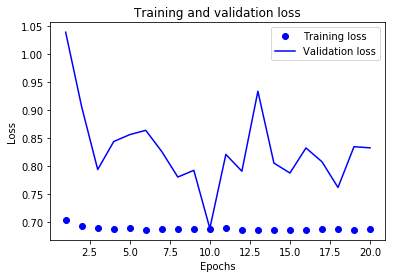

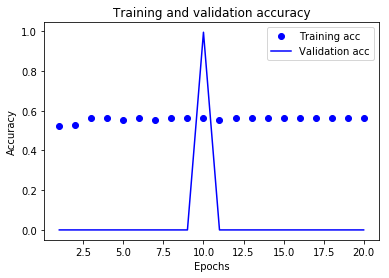

In [42]:
epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


plt.clf()   # clear figure
#acc_values = history_dict['acc']
#val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()